## Advance Regression Assignment: Building a regression model using regularisation in order to predict the actual value of the prospective properties 

The company wants to know:<br>
- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.<br>
<br>

**Business Goal**
 <br>
- The model will used by the management to understand how exactly the prices vary with the variables
- The model will be a good way for management to understand the pricing dynamics of a new market


In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Reading and Understanding the data

In [2]:
# Importing the file

home_df = pd.read_csv("train.csv")
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Checking the shape

home_df.shape

(1460, 81)

In [4]:
#Checking the info of the data frame
home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Missing value analysis and treatment

In [5]:
# Checking the percentage of missing values

round(home_df.isnull().sum()/len(home_df.index)*100,2)

# we can see that there are lot of columns with missing values

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [6]:
# Subsetting the data frame to look at missing values

missing_list = home_df.columns[home_df.isnull().any()].tolist()
missing_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
#Observing the dataframe of only missing values

missing_df = home_df[missing_list]
missing_df.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


In [8]:
#Checking the percentage of missing values

round(missing_df.isnull().sum()/len(missing_df.index)*100,2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

**Interpreatation**
1. ```LotFronatage``` is numeric column and can be imputated the missing values with mean or median<br>
<br>
2. We will impute with mode for ```MasVnrType``` for the missing values<br>
<br>
3. ```MasVnrArea``` is numeric column and can be imputated with mean or median<br>
<br>
4. ```Alley``` has around ~94% of missing values which means most of houses have no access to alley. ```We will drop this``` <br><br>
5. We need to impute ***No basement*** for all the missing values in the column ```BsmtQual, BsmtCond, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2```<br><br>
6. We will impute with mode for ```Electrical``` for the missing values<br><br>
7. We need to impute ***No Fireplace*** for all the missing values in the column ```FireplaceQu```<br><br>
8. We need to impute ***No Garage*** for all the missing values in the column ```GarageType, GarageYrBlt, GarageFinish, GarageQual and GarageCond```<br><br>
9. ```PoolQC``` has 99% of missing values which means most of the houses dont have pool and since it is largely skewwed ```we will drop this column```<br><br>
10. ```Fence ``` has 81% of missing values which means most of the houses dont have fence and since it is largely skewwed ```we will drop this column```<br><br>
11. We will drop ```MiscFeature``` column has it has lot of missing values and it is largely skewwed

In [9]:
# Checking the Shape before dropping the columns
home_df.shape

(1460, 81)

In [10]:
## from the above interpreatation dropping the colulmns

home_df = home_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1)
home_df.shape

(1460, 77)

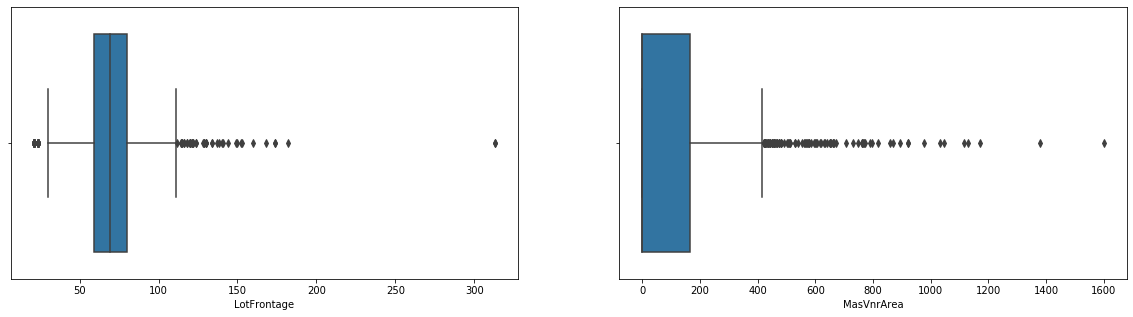

In [11]:
#Seeing the outlier distribution and deciding weather to impute mean or median

plt.figure(figsize = (20,5))

box = ['LotFrontage','MasVnrArea']

for i in enumerate(box):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(x = i[1], data = home_df)
    
# Looking at the below distribution we can say we need to impute the values with median

In [12]:
#Imputing the median for the column LotFrontage and MasVnrArea

home_df['LotFrontage'].fillna(home_df['LotFrontage'].median(), inplace = True)
home_df['MasVnrArea'].fillna(home_df['MasVnrArea'].median(), inplace = True)

In [13]:
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
#Checking the value count for MasVnrType

home_df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
#Imputing the missing values with None

home_df['MasVnrType'].fillna('None', inplace = True)

# None here means they dont have any type of Masonry veneer

In [16]:
# Imputing No bassement

home_df[['BsmtQual', 'BsmtCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = home_df[['BsmtQual', 'BsmtCond', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('No Basement')


In [17]:
#Checking the value count for Electrical

home_df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [18]:
# Imputing the missing values with mode

home_df['Electrical'].fillna('SBrkr', inplace = True)

In [19]:
# Imputing No Fireplace

home_df['FireplaceQu'].fillna('No Fireplace', inplace = True)

In [20]:
# Imputing No Garage

home_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond']] = home_df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond']].fillna('No Garage')

In [21]:
# We can finally see that there are no more missing values

round(home_df.isnull().sum()/len(home_df.index)*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 77, dtype: float64

### Data Exploration

In [22]:
# Once again the checking the info of the dataframe

home_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
# Looking at the statistical summary

home_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [24]:
# looking at the shape of dataframe

home_df.shape

(1460, 77)

In [25]:
# all numeric (float and int) variables in the dataset

home_df_numeric = home_df.select_dtypes(include=['float64', 'int64'])
home_df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000


In [26]:
# looking at the shape of dataframe

print(home_df_numeric.shape)

(1460, 37)


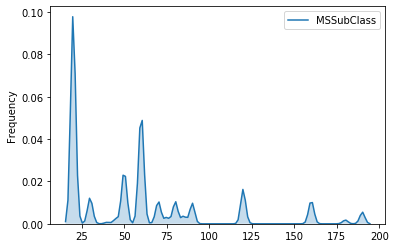

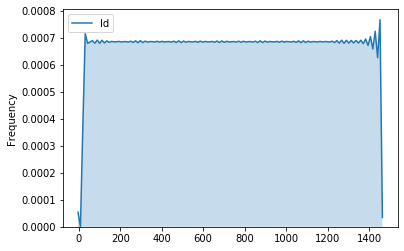

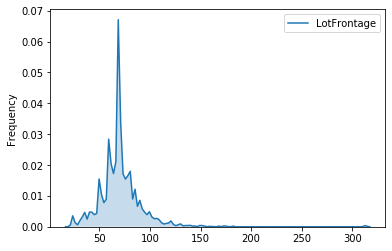

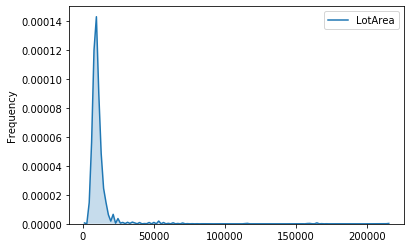

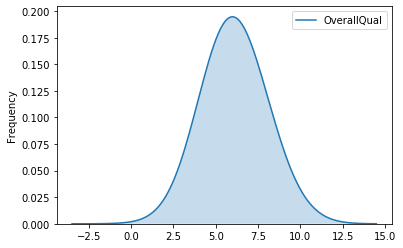

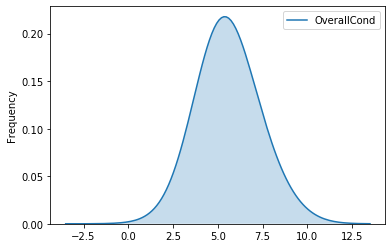

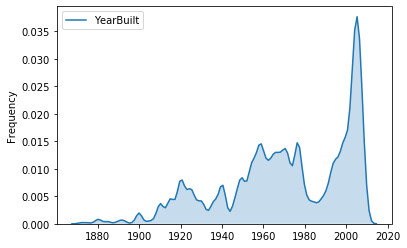

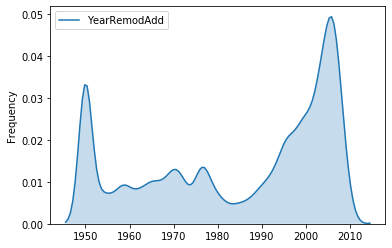

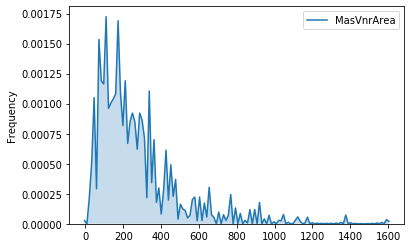

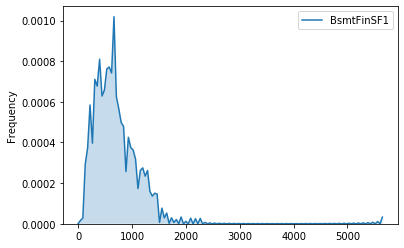

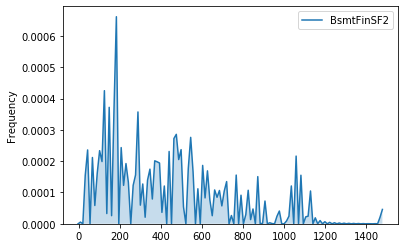

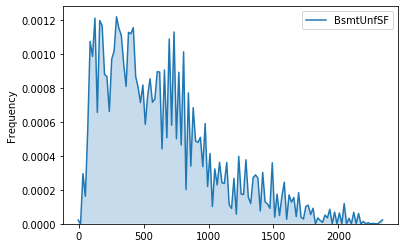

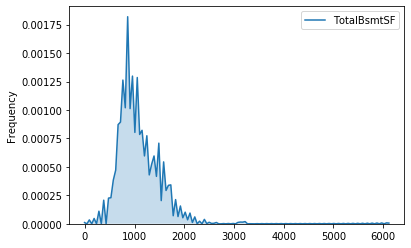

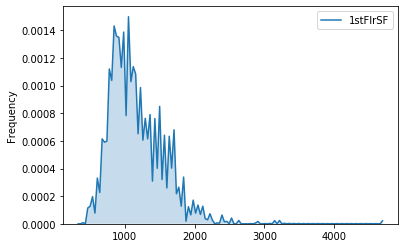

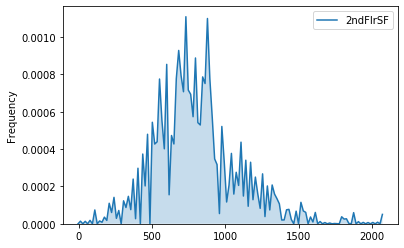

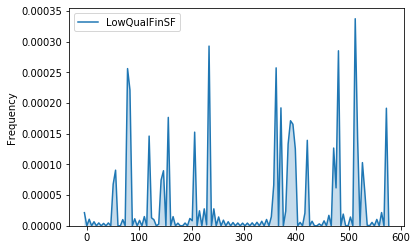

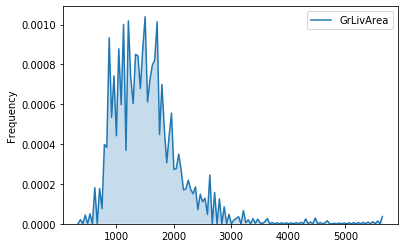

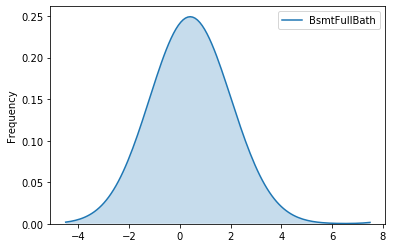

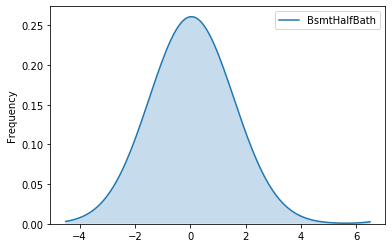

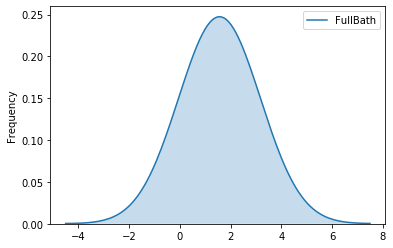

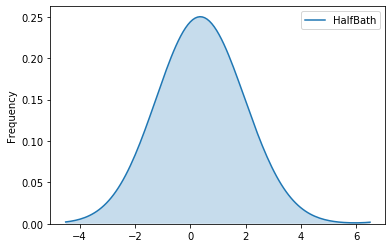

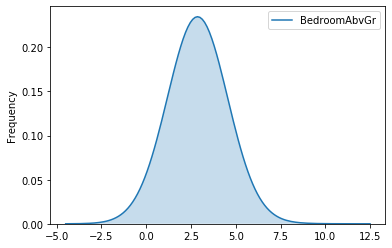

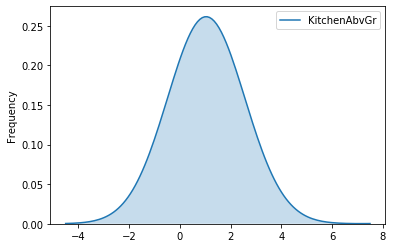

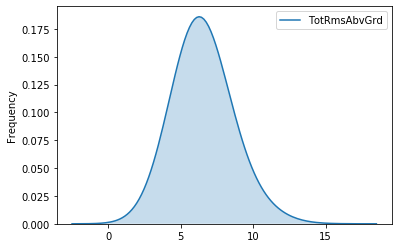

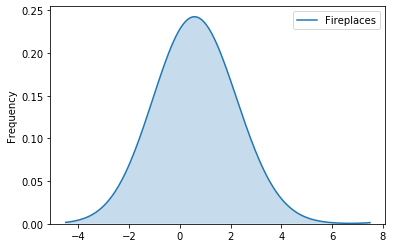

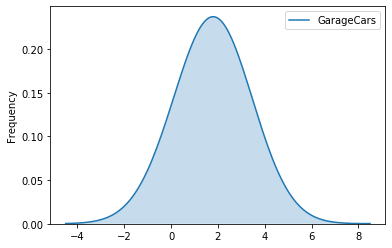

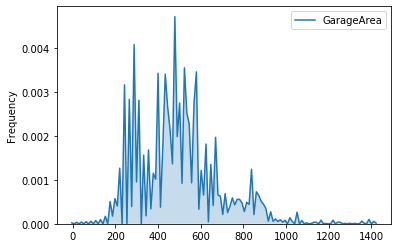

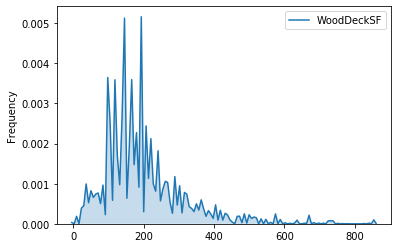

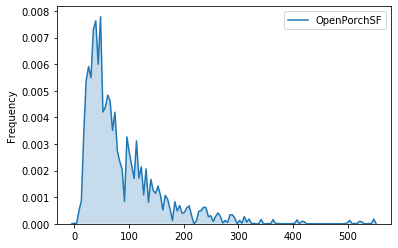

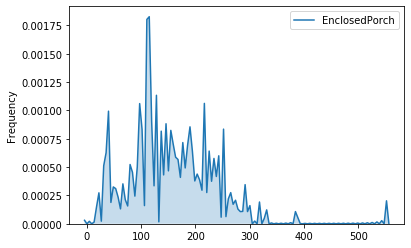

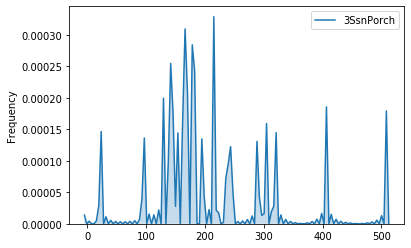

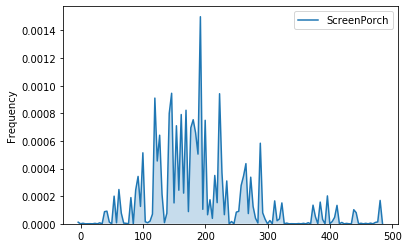

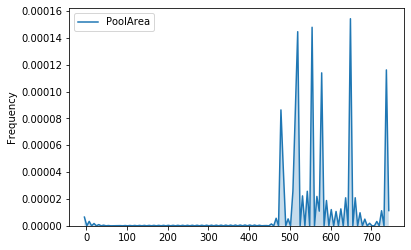

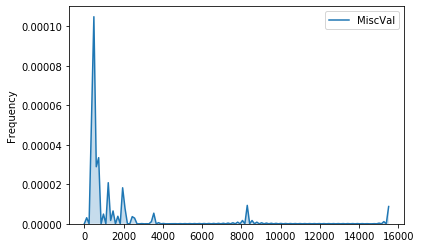

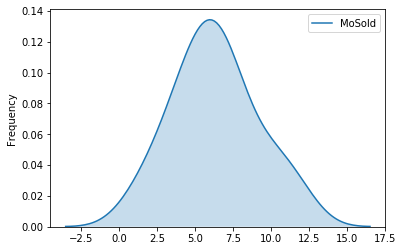

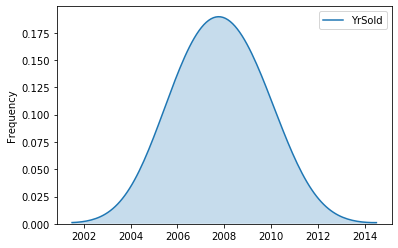

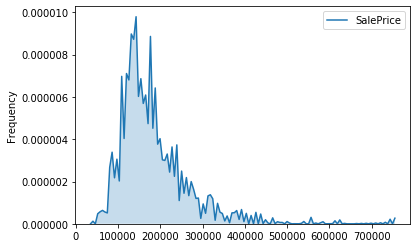

In [27]:
# plotting distribution plot for all the numeric varaibales and seeing freqency

plt.figure()

for i, col in enumerate(home_df_numeric.columns):
    plt.figure(i)
    sns.kdeplot(home_df_numeric[col],bw=1.5, shade = True)
    plt.ylabel('Frequency')

In [28]:
# From the above graph we see there are lot of features which are skewwed and dropping those features

home_df = home_df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch',
                       '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal',], axis =1)

In [29]:
# all numeric (float and int) variables in the dataset

home_df_numeric = home_df.select_dtypes(include=['float64', 'int64'])
home_df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,8,0,2,548,0,61,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,6,1,2,460,298,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,6,1,2,608,0,42,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,7,1,3,642,0,35,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,9,1,3,836,192,84,12,2008,250000


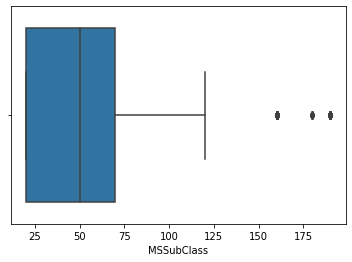

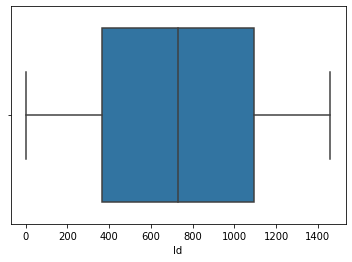

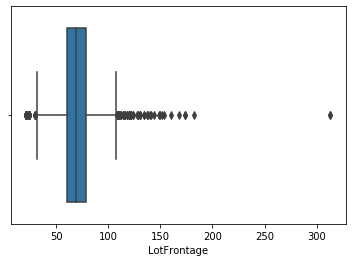

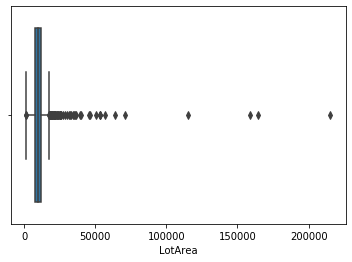

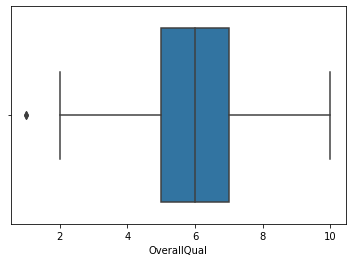

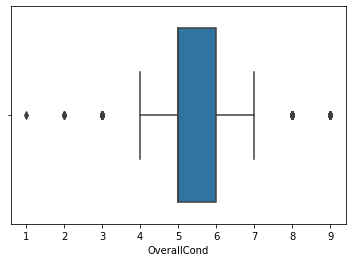

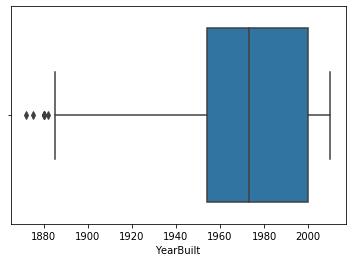

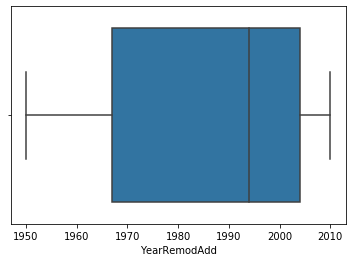

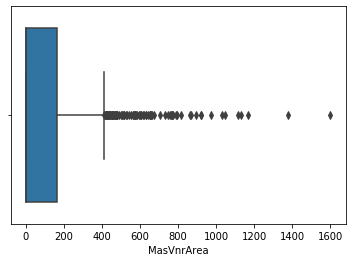

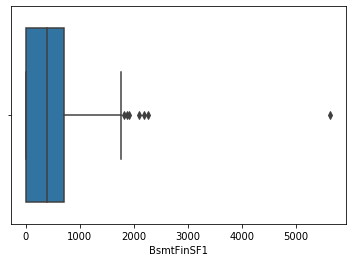

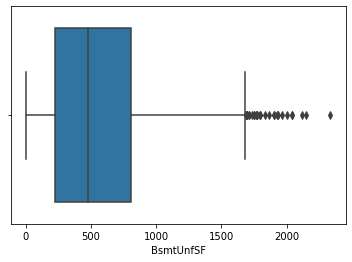

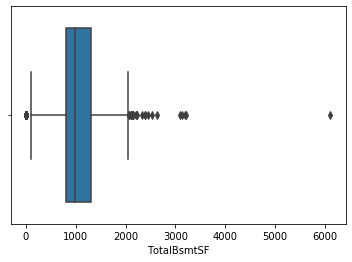

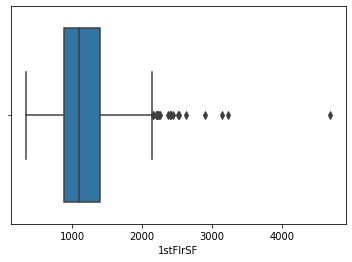

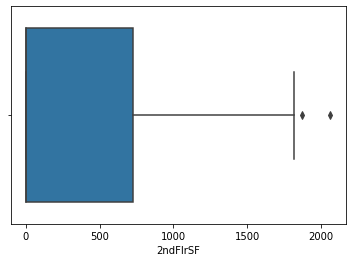

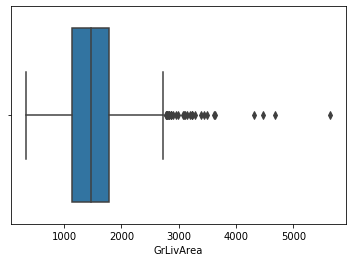

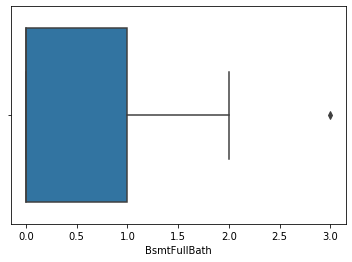

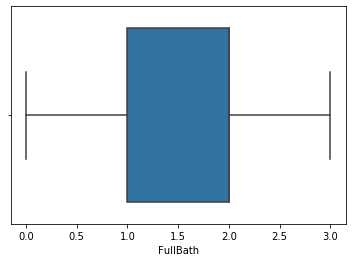

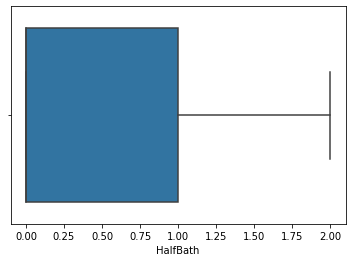

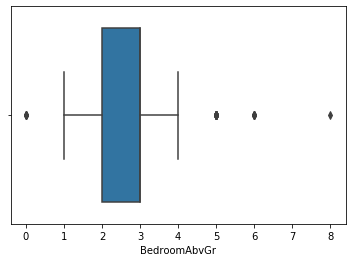

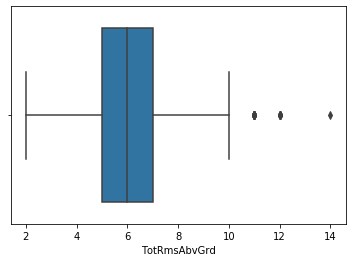

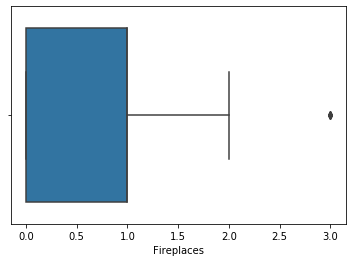

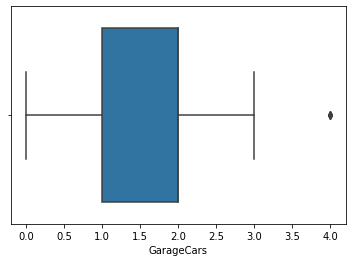

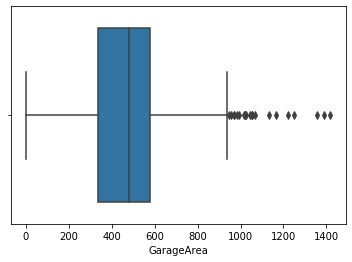

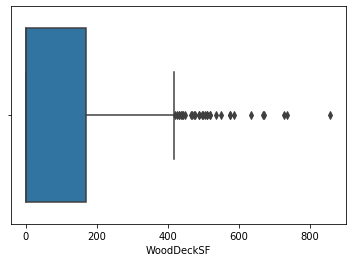

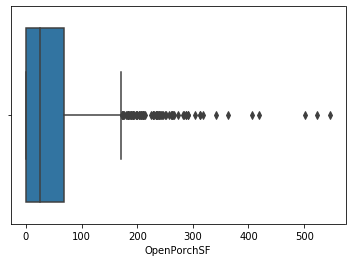

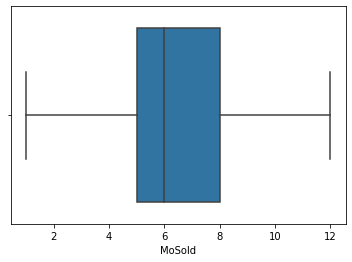

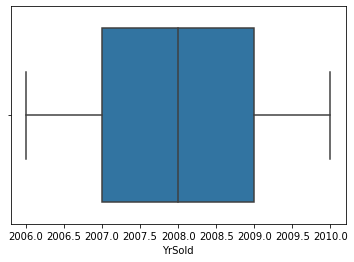

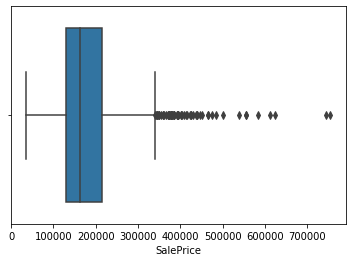

In [30]:
#plotting box plot to see for outliers

plt.figure()

for i, col in enumerate(home_df_numeric.columns):
    plt.figure(i)
    sns.boxplot(home_df_numeric[col])
    
    
# We see that there are many features which have outliers so we will perform outlier analysis

In [31]:
# Performing outlier analysis 

box = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold', 'SalePrice']

for i in box:
    q1 = home_df[i].quantile(0.01)
    q4 = home_df[i].quantile(0.99)
    home_df = home_df[(home_df[i]>=q1) & (home_df[i]<=q4)]

home_df.shape

(1152, 68)

In [32]:
#paiwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(home_df_numeric)
#plt.show()

In [33]:
# correlation matrix

cor = home_df_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009921,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.007940,-0.015415,0.010496,0.005590,0.008273,0.002289,0.005587,0.006784,0.037719,0.027239,-0.019772,0.016570,0.017634,-0.029643,-0.000477,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,0.131608,0.177354,-0.023438,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009921,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,0.368007,0.090343,0.180534,0.047222,0.236840,0.320518,0.233221,0.269539,0.323511,0.075542,0.137014,0.010451,0.006380,0.334771
LotArea,-0.033226,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,0.308159,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,-0.136841,-0.171098,-0.144203,0.028942,-0.079686,-0.054942,-0.194149,-0.060769,0.012980,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.272999,0.199108,0.102775,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.058543,0.004262,-0.107355,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420


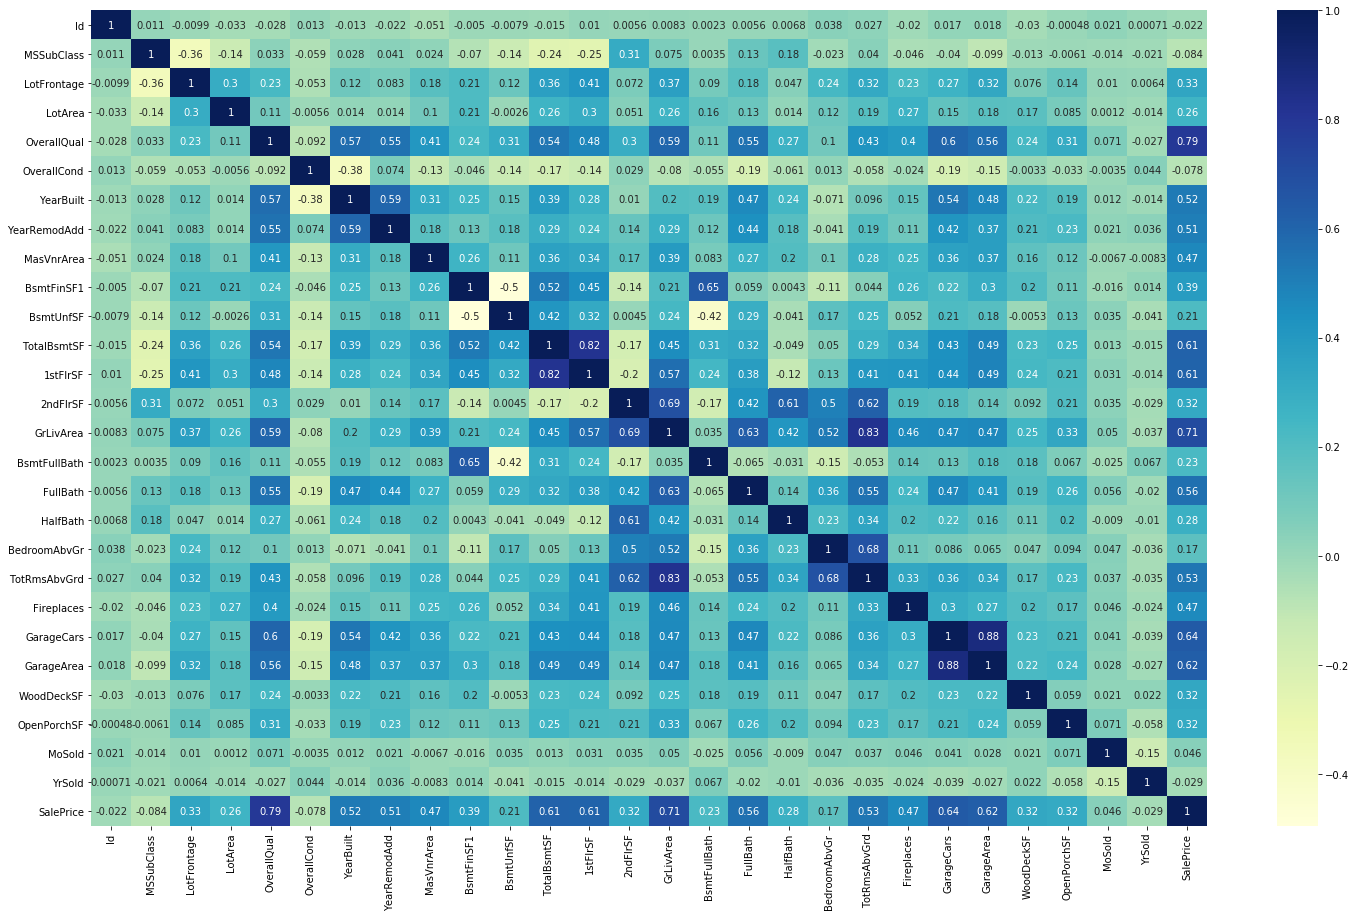

In [34]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,15))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [35]:
# subset all categorical variables

home_df_categorical = home_df.select_dtypes(include=['object'])
home_df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,2003,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,1976,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2001,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,1998,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,2000,RFn,TA,TA,Y,WD,Normal


In [36]:
# looking at the shape of dataframe

home_df_categorical.shape

(1152, 40)

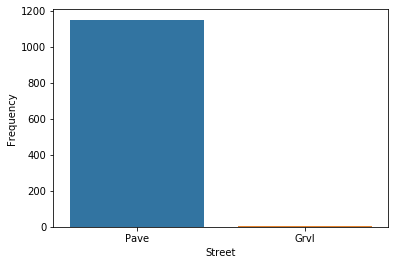

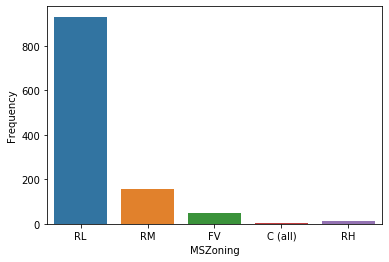

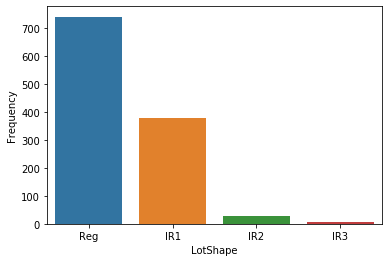

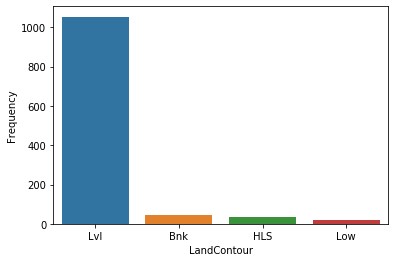

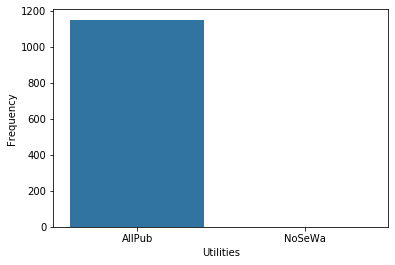

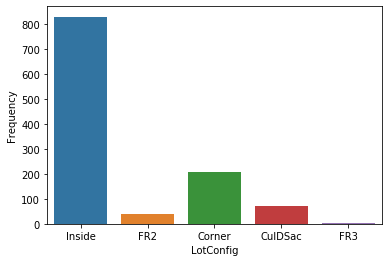

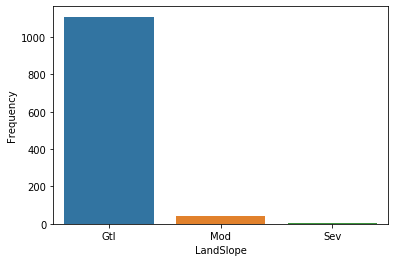

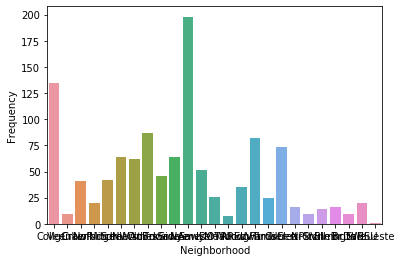

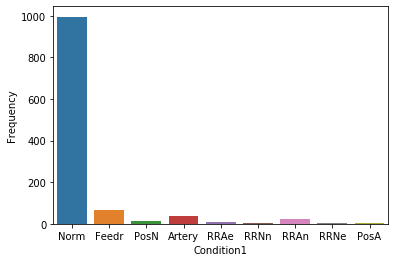

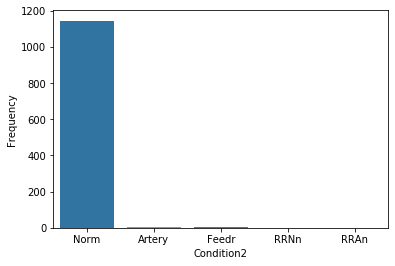

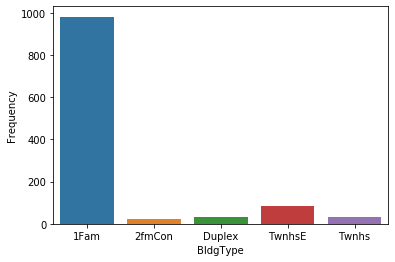

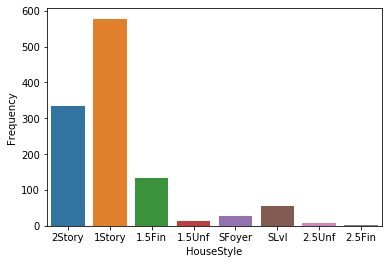

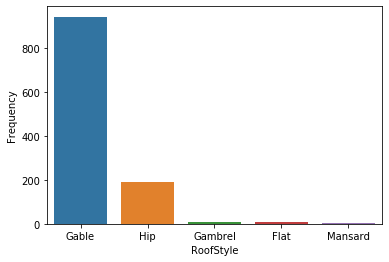

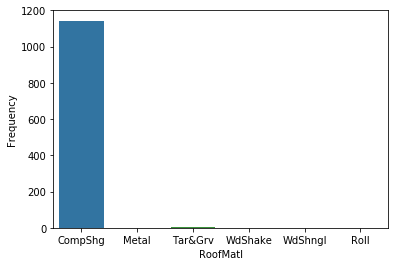

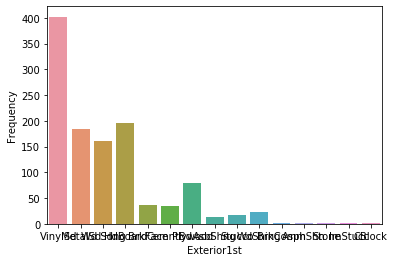

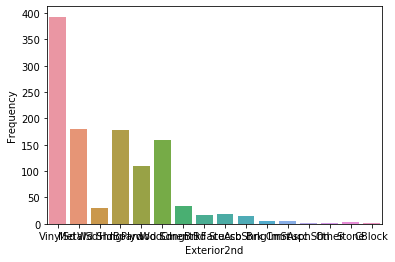

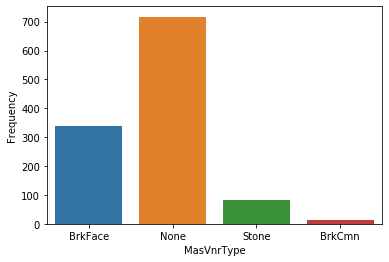

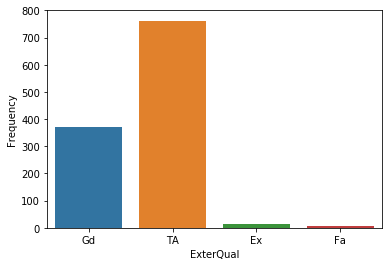

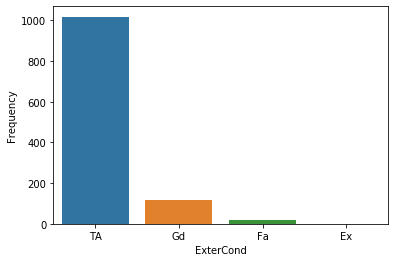

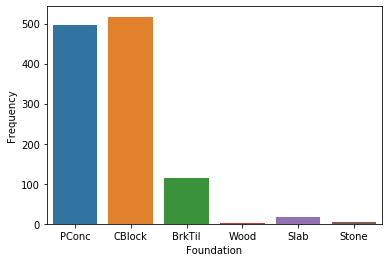

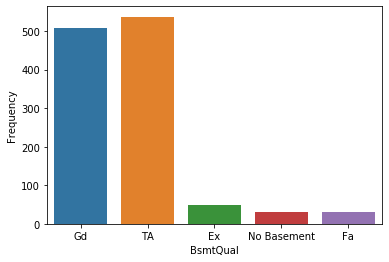

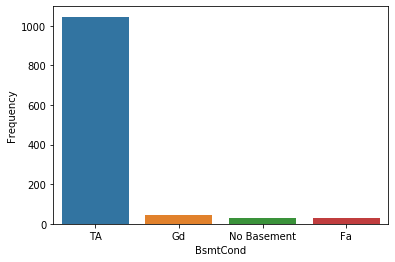

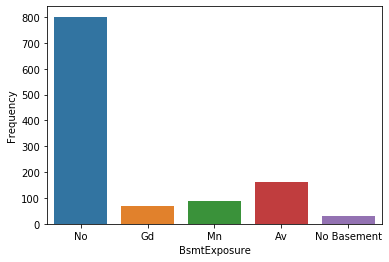

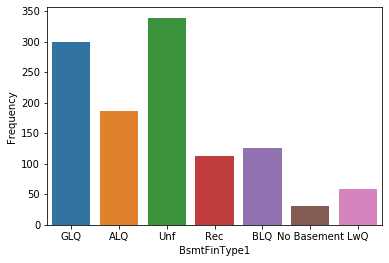

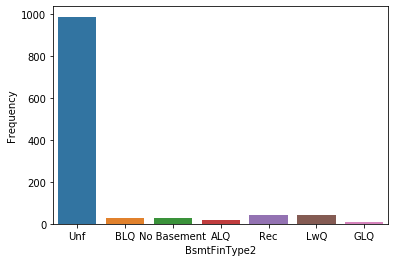

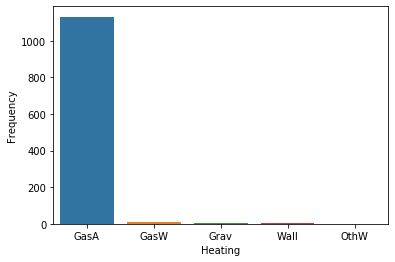

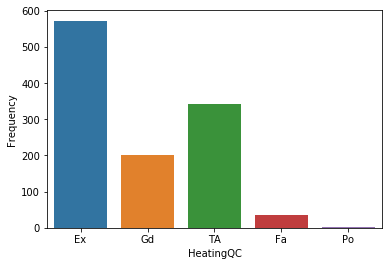

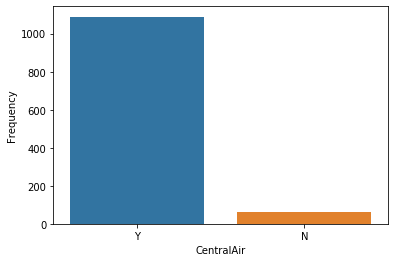

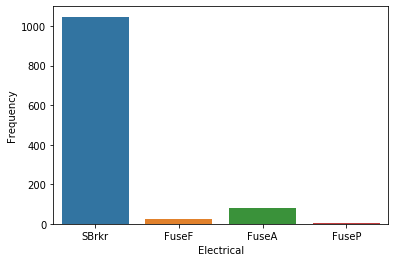

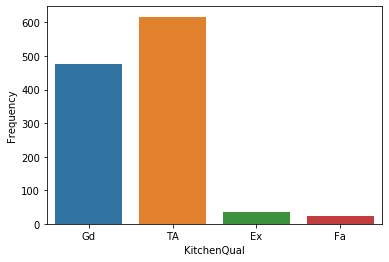

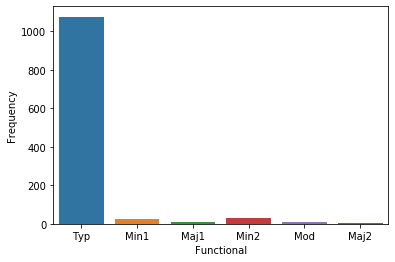

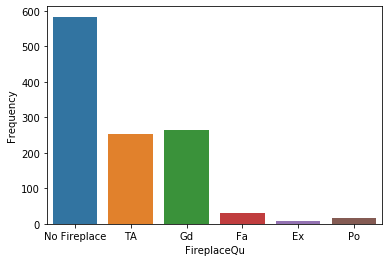

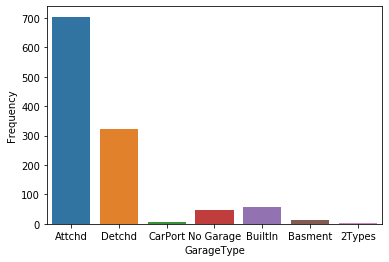

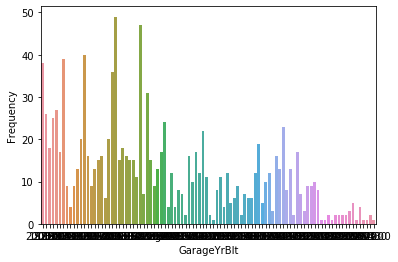

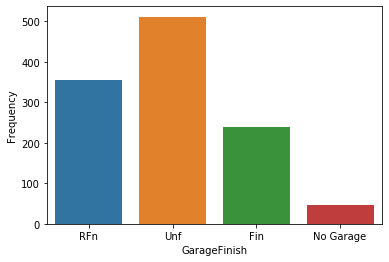

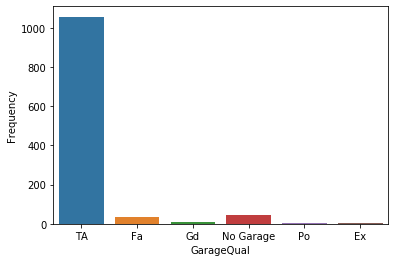

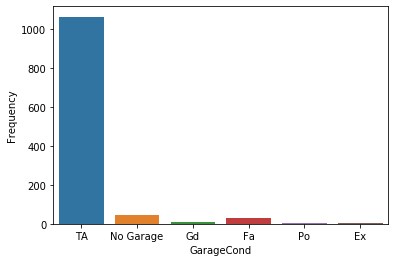

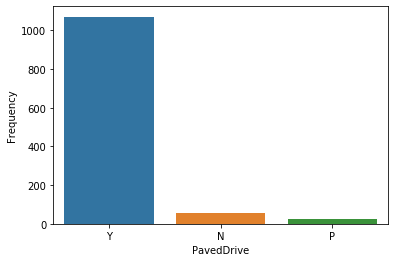

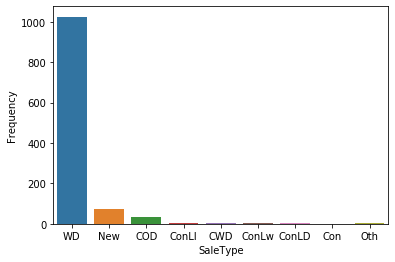

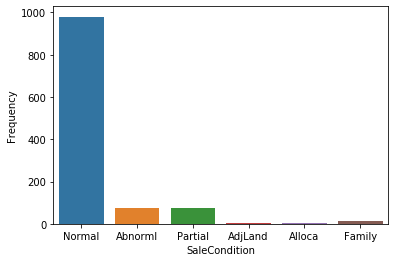

In [37]:
# plotting distribution plot for all the categorical varaibales and seeing freqency

plt.figure()

for i, col in enumerate(home_df_categorical.columns):
    plt.figure(i)
    sns.countplot(home_df_categorical[col])
    plt.ylabel('Frequency')

In [38]:
# Dropping highly skewwed features

home_df = home_df.drop(['Street','LandSlope','Condition1','Condition2','BldgType','RoofMatl','BsmtCond','BsmtFinType2','Heating','Functional','GarageQual',
'GarageCond','SaleType'], axis = 1)

In [39]:
# Converting the Y and N of Central Air to 1 and 0's Binary mapping

home_df['CentralAir'] = home_df['CentralAir'].map({'Y': 1, "N": 0})

In [40]:
# subset all categorical variables

home_df_categorical = home_df.select_dtypes(include=['object'])
home_df_categorical.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,Electrical,KitchenQual,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,PavedDrive,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,SBrkr,Gd,No Fireplace,Attchd,2003,RFn,Y,Normal
1,RL,Reg,Lvl,AllPub,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,SBrkr,TA,TA,Attchd,1976,RFn,Y,Normal
2,RL,IR1,Lvl,AllPub,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,SBrkr,Gd,TA,Attchd,2001,RFn,Y,Normal
3,RL,IR1,Lvl,AllPub,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Gd,SBrkr,Gd,Gd,Detchd,1998,Unf,Y,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,SBrkr,Gd,TA,Attchd,2000,RFn,Y,Normal


In [41]:
# looking at the shape of dataframe

home_df_categorical.shape

(1152, 26)

In [42]:
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,1,SBrkr,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,2003,RFn,2,548,Y,0,61,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1,SBrkr,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,Y,298,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,1,SBrkr,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,Y,0,42,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,1,SBrkr,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,Y,0,35,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,Y,192,84,12,2008,Normal,250000


In [43]:
# Looking at the statistical summary

home_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,723.211806,55.282118,68.245660,9435.155382,5.965278,5.628472,1971.031250,1983.835069,77.533854,400.672743,555.096354,1001.779514,0.945312,1105.202257,314.940104,1424.032986,0.386285,1.520833,0.356771,2.856771,6.304688,0.551215,1.705729,453.052083,82.927083,39.843750,6.265625,2007.812500,166903.016493
std,421.159910,41.105840,17.096737,3642.245825,1.162180,1.063977,28.709257,20.790600,129.578675,379.573776,417.366037,342.917746,0.227468,294.257409,394.752549,385.594756,0.487109,0.499783,0.479254,0.680731,1.286856,0.601893,0.657274,181.368365,109.043627,52.992499,2.671196,1.333098,51565.866066
min,1.000000,20.000000,21.000000,1680.000000,3.000000,3.000000,1900.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,525.000000,0.000000,747.000000,0.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,73000.000000
25%,360.750000,20.000000,60.000000,7493.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,230.000000,796.000000,1.000000,874.750000,0.000000,1121.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,315.000000,0.000000,0.000000,4.000000,2007.000000,129900.000000
50%,729.500000,50.000000,69.000000,9174.500000,6.000000,5.000000,1972.000000,1992.000000,0.000000,374.500000,468.000000,961.500000,1.000000,1054.000000,0.000000,1398.000000,0.000000,2.000000,0.000000,3.000000,6.000000,0.000000,2.000000,462.000000,0.000000,21.500000,6.000000,2008.000000,157700.000000
75%,1085.250000,70.000000,76.000000,11126.500000,7.000000,6.000000,1999.000000,2003.000000,120.500000,672.000000,799.500000,1214.250000,1.000000,1304.500000,702.000000,1668.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,560.500000,160.000000,61.000000,8.000000,2009.000000,194775.000000
max,1459.000000,190.000000,137.000000,34650.000000,9.000000,9.000000,2009.000000,2009.000000,660.000000,1456.000000,1774.000000,1845.000000,1.000000,1888.000000,1330.000000,2624.000000,1.000000,2.000000,1.000000,5.000000,10.000000,2.000000,3.000000,924.000000,486.000000,250.000000,12.000000,2010.000000,328000.000000


In [44]:
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,1,SBrkr,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,2003,RFn,2,548,Y,0,61,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1,SBrkr,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,Y,298,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,1,SBrkr,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,Y,0,42,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,1,SBrkr,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,Y,0,35,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,Y,192,84,12,2008,Normal,250000


In [45]:
# We notice there couple of year columns so we will convert them into number of years

home_df['Home Age'] = 2009 -home_df['YearBuilt']
home_df['Remod years'] = 2009 -home_df['YearRemodAdd']
home_df['Years Sold'] = 2010 -home_df['YrSold']

In [46]:
#Dropping 

home_df = home_df.drop(['YearBuilt','YearRemodAdd','YrSold'], axis = 1)
home_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,SaleCondition,SalePrice,Home Age,Remod years,Years Sold
0,1,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,1,SBrkr,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,2003,RFn,2,548,Y,0,61,2,Normal,208500,6,6,2
1,2,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Veenker,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1,SBrkr,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976,RFn,2,460,Y,298,0,5,Normal,181500,33,33,3
2,3,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,CollgCr,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,1,SBrkr,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001,RFn,2,608,Y,0,42,9,Normal,223500,8,7,2
3,4,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Crawfor,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,1,SBrkr,961,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998,Unf,3,642,Y,0,35,2,Abnorml,140000,94,39,4
4,5,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,NoRidge,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1,SBrkr,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000,RFn,3,836,Y,192,84,12,Normal,250000,9,9,2


In [47]:
home_df.shape

(1152, 55)

### Data Preparation

In [48]:
# convert into dummies

home_dummies = pd.get_dummies(home_df_categorical, drop_first=True)
home_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt_1994.0,GarageYrBlt_1995.0,GarageYrBlt_1996.0,GarageYrBlt_1997.0,GarageYrBlt_1998.0,GarageYrBlt_1999.0,GarageYrBlt_2000.0,GarageYrBlt_2001.0,GarageYrBlt_2002.0,GarageYrBlt_2003.0,GarageYrBlt_2004.0,GarageYrBlt_2005.0,GarageYrBlt_2006.0

In [49]:
# drop categorical variables 

home_df = home_df.drop(list(home_df_categorical.columns), axis=1)

In [50]:
# concat dummy variables with main data frame

home_df = pd.concat([home_df,home_dummies], axis=1)
home_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,

In [51]:
# We do not need the ID column and we will drop it

home_df = home_df.drop('Id', axis =1)
home_df.head() # This is going to be the main data frame

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,SalePrice,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,Gar

In [52]:
#Checking the shape of the data frame

home_df.shape

(1152, 261)

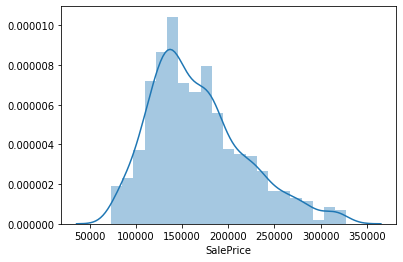

In [53]:
# We notice that the target variable sales is a bit skweed

sns.distplot(home_df['SalePrice'])

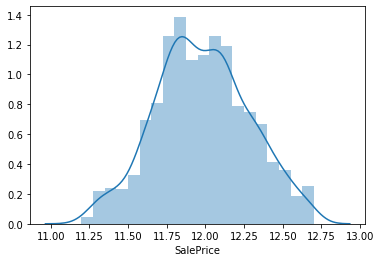

In [54]:
# Performing log trasnformation on the data set

home_df['SalePrice'] = np.log(home_df['SalePrice'])
sns.distplot(home_df['SalePrice'])

In [55]:
y = home_df.loc[:, 'SalePrice']
X = home_df.loc[:, home_df.columns != 'SalePrice']

In [56]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1

In [57]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [58]:
# scale
#scaler = StandardScaler()
#scaler.fit([X.columns])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1

### Ridge Regression 

In [60]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001,0.01,0.1,10,50,100,120,140,160,180,200,250,300,400,500]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 120,
                                   140, 160, 180, 200, 250, 300, 400, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Creating dataframe to see results

cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.092624,0.145686,0.007814,0.001007,0.0001,{'alpha': 0.0001},-0.094146,-0.093252,-0.089399,-0.095918,-0.087993,-0.092142,0.002975,16,-0.052184,-0.049963,-0.052311,-0.051488,-0.053366,-0.051862,0.001124
1,0.013565,0.003520,0.006819,0.002922,0.001,{'alpha': 0.001},-0.094088,-0.093251,-0.089388,-0.095916,-0.087989,-0.092126,0.002970,15,-0.052185,-0.049963,-0.052312,-0.051488,-0.053366,-0.051863,0.001124
2,0.014977,0.003671,0.006398,0.003199,0.01,{'alpha': 0.01},-0.093532,-0.093239,-0.089279,-0.095890,-0.087941,-0.091976,0.002929,14,-0.052196,-0.049963,-0.052326,-0.051490,-0.053365,-0.051868,0.001125
3,0.015830,0.003551,0.008343,0.000570,0.1,{'alpha': 0.1},-0.089835,-0.093125,-0.088554,-0.095657,-0.087524,-0.090939,0.003020,13,-0.052293,-0.049959,-0.052420,-0.051500,-0.053367,-0.051908,0.001140
4,0.014723,0.003446,0.007417,0.003816,10,{'alpha': 10},-0.078794,-0.089154,-0.084534,-0.087796,-0.081332,-0.084322,0.003872,12,-0.052928,-0.050031,-0.053173,-0.052048,-0.053789,-0.052394,0.001307


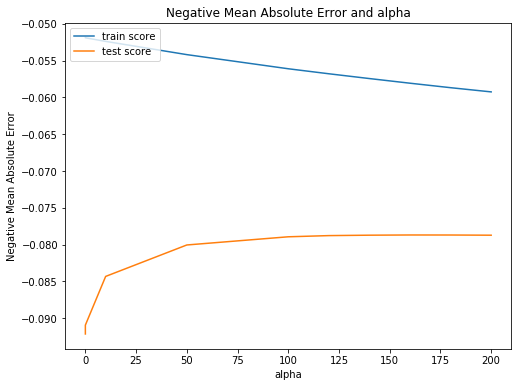

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize = (8,6))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
# looking at the best aplha value and best score

print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

{'alpha': 160}
-0.07869385176353662


In [64]:
#Setting the aplha value to 160 

alpha = 160
ridge = Ridge(alpha=alpha)

#Fitting on dataset and seeing the co-efficents
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.07050332e-02,  5.31075361e-03,  1.44871395e-02,  3.84970975e-02,
        2.71573943e-02,  6.69498256e-03,  1.63133563e-02,  3.42168570e-03,
        3.30367787e-02,  7.98739259e-03,  2.20046574e-02,  2.19259819e-02,
        3.73273925e-02,  9.81561619e-03,  1.02224898e-02,  1.31779505e-02,
        5.02428619e-03,  1.01786162e-02,  1.04872543e-02,  1.08872010e-02,
        1.63837737e-02,  1.07534974e-02,  8.75707305e-03,  1.76926090e-03,
       -1.99335273e-02, -1.38143967e-02,  1.11631802e-03,  4.14358591e-03,
        3.27842369e-03,  9.50576140e-03, -1.07644352e-02,  3.72691593e-03,
       -3.47772818e-03, -2.98559527e-03, -6.79135712e-05, -1.89903773e-03,
        3.04448957e-04, -4.26653209e-03,  4.91642423e-03, -7.99199772e-03,
        1.82348225e-03,  6.55231041e-04,  7.65604563e-04, -2.93070959e-03,
        4.89314081e-03,  4.80619806e-03,  3.87097810e-04,  2.46779025e-02,
       -1.45162133e-02, -4.14069234e-03,  2.30860298e-03, -1.53566385e-02,
       -5.81655038e-03, -

In [65]:
# model with optimal alpha
# ridge regression

lm_ridge = Ridge(alpha=160)
lm_ridge.fit(X_train, y_train)

# predict
#r2 value for training dataset
y_train_pred = lm_ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for test dataset
y_test_pred = lm_ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9291827546427291
0.8884387499112203


In [66]:
#Setting ridge parameters

model_parameter = list(lm_ridge.coef_)
model_parameter.insert(0, lm_ridge.intercept_)
cols = X_train.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Ridge_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Ridge_coeff.columns = ['Features', 'Co-efficents']
Ridge_coeff = Ridge_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Ridge_coeff = Ridge_coeff.reset_index(drop = True)
Ridge_coeff.head(10)

,Features,Co-efficents
0,MSSubClass,11.979798
1,OverallCond,0.038497
2,CentralAir,0.033037
3,MasVnrArea,0.027157
4,BsmtUnfSF,0.016313
5,OverallQual,0.014487
6,BsmtFinSF1,0.006695
7,LotArea,0.005311
8,TotalBsmtSF,0.003422
9,LotFrontage,-0.010705


In [67]:
### FOR SUBJECTIVE  QUESTIONS

#Setting the aplha value to 320

alpha = 320
ridge = Ridge(alpha=alpha)

#Fitting on dataset and seeing the co-efficents
ridge.fit(X_train, y_train)
ridge.coef_

array([-8.27410396e-03,  6.44742591e-03,  1.36523579e-02,  3.36927095e-02,
        2.15461478e-02,  6.79660793e-03,  1.54336919e-02,  3.38167852e-03,
        2.74794255e-02,  8.88253153e-03,  2.11799715e-02,  1.68548217e-02,
        3.23253769e-02,  9.24667059e-03,  1.08597495e-02,  1.25303416e-02,
        5.65137938e-03,  1.22877246e-02,  1.05136052e-02,  1.19201684e-02,
        1.60651763e-02,  9.95608298e-03,  9.44191913e-03,  1.89589011e-03,
       -1.49264575e-02, -1.37309580e-02,  1.24573483e-03,  4.27119209e-03,
        2.08162948e-03,  8.40385768e-03, -1.07325043e-02,  3.58751839e-03,
       -3.02457731e-03, -3.87343132e-03,  6.82512993e-04, -1.34582972e-03,
        5.01586070e-04, -4.13967457e-03,  4.69401185e-03, -6.69089616e-03,
        1.20254302e-03,  6.28678193e-04,  7.99522821e-04, -3.23887504e-03,
        3.73612981e-03,  5.09245943e-03,  1.23033082e-03,  2.09266847e-02,
       -1.29482900e-02, -3.17990601e-03,  1.05994093e-03, -1.45529149e-02,
       -4.60112996e-03, -

In [68]:
### FOR SUBJECTIVE  QUESTIONS

# model with optimal alpha
# ridge regression

lm_ridge = Ridge(alpha=320)
lm_ridge.fit(X_train, y_train)

# predict
#r2 value for training dataset
y_train_pred = lm_ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for test dataset
y_test_pred = lm_ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9212005579039757
0.8869138447267524


In [69]:
### FOR SUBJECTIVE  QUESTIONS

#Setting ridge parameters

model_parameter = list(lm_ridge.coef_)
model_parameter.insert(0, lm_ridge.intercept_)
cols = X_train.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Ridge_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Ridge_coeff.columns = ['Features', 'Co-efficents']
Ridge_coeff = Ridge_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Ridge_coeff = Ridge_coeff.reset_index(drop = True)
Ridge_coeff.head(10)

,Features,Co-efficents
0,MSSubClass,11.979339
1,OverallCond,0.033693
2,CentralAir,0.027479
3,MasVnrArea,0.021546
4,BsmtUnfSF,0.015434
5,OverallQual,0.013652
6,BsmtFinSF1,0.006797
7,LotArea,0.006447
8,TotalBsmtSF,0.003382
9,LotFrontage,-0.008274


### Lasso

In [70]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,
                   0.006,0.007,0.008,0.009,0.01]}

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    7.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Creating dataframe to see results

cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.205712,0.053711,0.006381,0.003191,0.0001,{'alpha': 0.0001},-0.080280,-0.090785,-0.084960,-0.091358,-0.083042,-0.086085,0.004338,19,-0.052767,-0.049731,-0.052879,-0.051779,-0.053486,-0.052128,0.001318
1,0.158688,0.046384,0.005840,0.003112,0.0002,{'alpha': 0.0002},-0.078594,-0.088631,-0.083118,-0.088111,-0.079907,-0.083672,0.004112,18,-0.052870,-0.049792,-0.053034,-0.051984,-0.053818,-0.052300,0.001383
2,0.160662,0.046392,0.006100,0.003217,0.0003,{'alpha': 0.0003},-0.077500,-0.086859,-0.081563,-0.085457,-0.078292,-0.081934,0.003734,17,-0.053135,-0.050047,-0.053273,-0.052287,-0.054033,-0.052555,0.001371
3,0.116939,0.051180,0.005021,0.004117,0.0004,{'alpha': 0.0004},-0.076606,-0.085835,-0.080286,-0.083282,-0.077111,-0.080624,0.003545,16,-0.053525,-0.050383,-0.053523,-0.052711,-0.054220,-0.052873,0.001333
4,0.082787,0.017928,0.006405,0.003203,0.0005,{'alpha': 0.0005},-0.075862,-0.085086,-0.079066,-0.081718,-0.076124,-0.079571,0.003491,15,-0.053834,-0.050651,-0.053786,-0.053135,-0.054420,-0.053165,0.001321


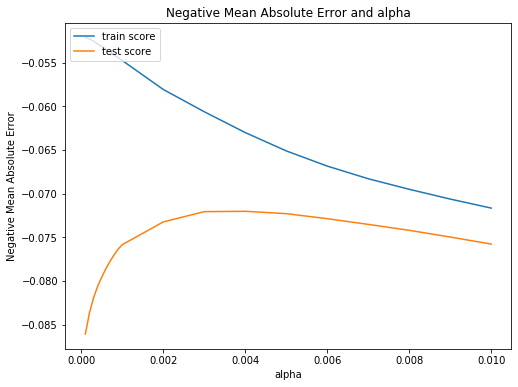

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize = (8,6))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
# looking at the best aplha value and best score

print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.004}
-0.07203570744192447


In [74]:
#Setting the aplha value to 0.004

alpha = 0.004
ridge = Lasso(alpha=alpha)

#Fitting on dataset and seeing the co-efficents

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0

In [75]:
# model with optimal alpha
# lasso regression

lm_lasso = Lasso(alpha=0.004)
lm_lasso.fit(X_train, y_train)

# predict

#r2 value for training dataset
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for testing dataset
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9147674285252451
0.9015316643173712


In [76]:
#Setting lasso model paramters

model_parameter = list(lm_lasso.coef_)
model_parameter.insert(0, lm_lasso.intercept_)
cols = X.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Lasso_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Lasso_coeff.columns = ['Features', 'Co-efficents']
Lasso_coeff = Lasso_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Lasso_coeff = Ridge_coeff.reset_index(drop = True)
Lasso_coeff.head(10)

,Features,Co-efficents
0,MSSubClass,11.979339
1,OverallCond,0.033693
2,CentralAir,0.027479
3,MasVnrArea,0.021546
4,BsmtUnfSF,0.015434
5,OverallQual,0.013652
6,BsmtFinSF1,0.006797
7,LotArea,0.006447
8,TotalBsmtSF,0.003382
9,LotFrontage,-0.008274


In [77]:
### FOR SUBJECTIVE  QUESTIONS

#Setting the aplha value to 0.008

alpha = 0.008
ridge = Lasso(alpha=alpha)

#Fitting on dataset and seeing the co-efficents

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0.,
        0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
       -0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0., -0.,  0., -0., -0.,  0.,  0., -0., -0., -0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
       -0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0., -0

In [78]:
### FOR SUBJECTIVE  QUESTIONS

# model with optimal alpha
# lasso regression

lm_lasso = Lasso(alpha=0.008)
lm_lasso.fit(X_train, y_train)

# predict

#r2 value for training dataset
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for testing dataset
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8983080675243464
0.8909237775579978


In [79]:
### FOR SUBJECTIVE QUESTIONS

#Setting lasso model paramters

model_parameter = list(lm_lasso.coef_)
model_parameter.insert(0, lm_lasso.intercept_)
cols = X.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Lasso_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Lasso_coeff.columns = ['Features', 'Co-efficents']
Lasso_coeff = Lasso_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Lasso_coeff = Ridge_coeff.reset_index(drop = True)
Lasso_coeff.head(10)

,Features,Co-efficents
0,MSSubClass,11.979339
1,OverallCond,0.033693
2,CentralAir,0.027479
3,MasVnrArea,0.021546
4,BsmtUnfSF,0.015434
5,OverallQual,0.013652
6,BsmtFinSF1,0.006797
7,LotArea,0.006447
8,TotalBsmtSF,0.003382
9,LotFrontage,-0.008274


### Summary

**R2 score with ridge regression:**
- Train score : 0.93
- Test score: 0.89<br><br>

**R2 score with lasso regression:**
- Train score : 0.91
- Test score: 0.90

**Top features that are contributing to the model are:** 
- MSSubClass
- OverallCond
- CentralAir
- MasVnrArea
- BsmtUnfSF
- OverallQual
- BsmtFinSF1
- LotArea
- TotalBsmtSF
- LotFrontage

#### Conclusion

- ```MSSubClass``` is the most important contributor it Identifies the type of dwelling involved in the sale and looking at the statistical summary, the mean is ~55 which means Austrillian people prefer 1-1/2 STORY FINISHED ALL AGES and 2-STORY 1946 & NEWER<br><br>
- ```OverallCond```- we need to look into Average category house condition<br><br>
- ```CentralAir``` - We need have home which have Central air conditioning<br><br>
- ```MasVnrArea``` - Masonry veneer area should be around 77.5 square feet<br><br>
- ```BsmtUnfSF``` - We notice that the unfinished basement area should have 555 squarefoot on an average<br><br>
- ```OverallQual``` - Overall material and finish of the house should have atleast an avergae rating of 6 which means Avove average<br><br>
- ```BsmtFinSF1``` - Basement finished area should have avergae of 401 square feet<br><br>
- ```LotArea```- Lot size should be atleast around of 9435 square feet<br><br>
- ```TotalBsmtSF```-Basement area should be around avergae of 1002 square feet <br><br>
- ```LotFrontage``` - is the Linear feet of street connected to property and the distance should have average around 68 feet
 


### Subjective Questions

***REBUILDING THE MODEL AFTER DROPPING THE TOP 5 VARIABLES***` 

In [80]:
X = home_df.loc[:, home_df.columns != 'SalePrice']
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1

In [81]:
X = X.drop(['MSSubClass','OverallCond','CentralAir','MasVnrArea','BsmtUnfSF'], axis =1 )
X.head()

,LotFrontage,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt

In [82]:
# scaling the features
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       ...
       'GarageFinish_No Garage', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'PavedDrive_P', 'PavedDrive_Y', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=255)

In [83]:
# scale
#scaler = StandardScaler()
#scaler.fit([X.columns])

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
X.head()

,LotFrontage,LotArea,OverallQual,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,Home Age,Remod years,Years Sold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageYrBlt_1906.0,GarageYrBlt_1910.0,GarageYrBlt_1914.0,GarageYrBlt_1915.0,GarageYrBlt_1916.0,GarageYrBlt_1918.0,GarageYrBlt_1920.0,GarageYrBlt_1921.0,GarageYrBlt_1922.0,GarageYrBlt_1923.0,GarageYrBlt_1924.0,GarageYrBlt_1925.0,GarageYrBlt_1926.0,GarageYrBlt_1927.0,GarageYrBlt_1928.0,GarageYrBlt_1929.0,GarageYrBlt_1930.0,GarageYrBlt_1931.0,GarageYrBlt_1932.0,GarageYrBlt_1933.0,GarageYrBlt_1934.0,GarageYrBlt_1935.0,GarageYrBlt_1936.0,GarageYrBlt_1937.0,GarageYrBlt_1938.0,GarageYrBlt_1939.0,GarageYrBlt_1940.0,GarageYrBlt_1941.0,GarageYrBlt_1942.0,GarageYrBlt_1945.0,GarageYrBlt_1946.0,GarageYrBlt_1947.0,GarageYrBlt_1948.0,GarageYrBlt_1949.0,GarageYrBlt_1950.0,GarageYrBlt_1951.0,GarageYrBlt_1952.0,GarageYrBlt_1953.0,GarageYrBlt_1954.0,GarageYrBlt_1955.0,GarageYrBlt_1956.0,GarageYrBlt_1957.0,GarageYrBlt_1958.0,GarageYrBlt_1959.0,GarageYrBlt_1960.0,GarageYrBlt_1961.0,GarageYrBlt_1962.0,GarageYrBlt_1963.0,GarageYrBlt_1964.0,GarageYrBlt_1965.0,GarageYrBlt_1966.0,GarageYrBlt_1967.0,GarageYrBlt_1968.0,GarageYrBlt_1969.0,GarageYrBlt_1970.0,GarageYrBlt_1971.0,GarageYrBlt_1972.0,GarageYrBlt_1973.0,GarageYrBlt_1974.0,GarageYrBlt_1975.0,GarageYrBlt_1976.0,GarageYrBlt_1977.0,GarageYrBlt_1978.0,GarageYrBlt_1979.0,GarageYrBlt_1980.0,GarageYrBlt_1981.0,GarageYrBlt_1982.0,GarageYrBlt_1983.0,GarageYrBlt_1984.0,GarageYrBlt_1985.0,GarageYrBlt_1986.0,GarageYrBlt_1987.0,GarageYrBlt_1988.0,GarageYrBlt_1989.0,GarageYrBlt_1990.0,GarageYrBlt_1991.0,GarageYrBlt_1992.0,GarageYrBlt_1993.0,GarageYrBlt

### Ridge Regression 

In [85]:
# list of alphas to tune

params = {'alpha': [0.0001, 0.001,0.01,0.1,10,50,100,120,140,160,180,200,250,300,400,500]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 10, 50, 100, 120,
                                   140, 160, 180, 200, 250, 300, 400, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
# Creating dataframe to see results

cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021569,0.009903,0.010433,0.002904,0.0001,{'alpha': 0.0001},-0.098764,-0.098149,-0.096958,-0.096375,-0.095679,-0.097185,0.001131,16,-0.055675,-0.053079,-0.055753,-0.055936,-0.056250,-0.055339,0.001147
1,0.017005,0.002029,0.007640,0.002093,0.001,{'alpha': 0.001},-0.098717,-0.098147,-0.096941,-0.096372,-0.095675,-0.097170,0.001120,15,-0.055677,-0.053079,-0.055755,-0.055936,-0.056250,-0.055339,0.001147
2,0.017521,0.004215,0.009324,0.002140,0.01,{'alpha': 0.01},-0.098268,-0.098133,-0.096776,-0.096344,-0.095630,-0.097030,0.001024,14,-0.055691,-0.053079,-0.055780,-0.055938,-0.056250,-0.055347,0.001150
3,0.016962,0.003951,0.008330,0.002908,0.1,{'alpha': 0.1},-0.095168,-0.097993,-0.095739,-0.096094,-0.095246,-0.096048,0.001029,13,-0.055803,-0.053076,-0.055992,-0.055954,-0.056254,-0.055415,0.001179
4,0.016939,0.002373,0.007853,0.002146,10,{'alpha': 10},-0.085422,-0.093606,-0.090848,-0.089805,-0.088808,-0.089698,0.002671,12,-0.056703,-0.053515,-0.057202,-0.056484,-0.056819,-0.056145,0.001335


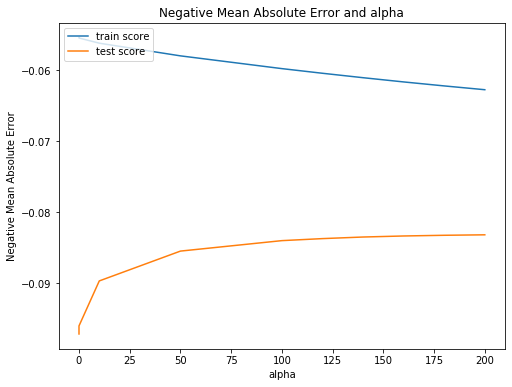

In [87]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.figure(figsize = (8,6))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [88]:
# looking at the best aplha value and best score

print(model_cv_ridge.best_params_)
print(model_cv_ridge.best_score_)

{'alpha': 250}
-0.08313748003446413


In [89]:
#Setting the aplha value to 250 

alpha = 250
ridge = Ridge(alpha=alpha)

#Fitting on dataset and seeing the co-efficents
ridge.fit(X_train, y_train)
ridge.coef_

array([ 7.68687996e-03,  1.42800931e-02,  3.79079365e-02,  1.49375068e-02,
        2.98167612e-02,  2.08274673e-02,  1.79947809e-02,  3.30898011e-02,
        8.69029651e-03,  6.50381398e-03,  1.21476648e-02,  6.97133266e-03,
        1.16132092e-02,  1.04213987e-02,  1.15350396e-02,  1.72407214e-02,
        1.10153820e-02,  9.76738388e-03,  1.73912118e-03, -1.32198484e-02,
       -1.94701619e-02,  7.50196165e-04,  3.27475447e-03,  1.55795265e-03,
        9.48580327e-03, -1.03615188e-02,  3.39190505e-03, -3.59998543e-03,
       -4.58629574e-03,  6.54905363e-04, -2.09554198e-03,  6.93313616e-04,
       -3.36652259e-03,  4.67985354e-03, -7.39139053e-03,  9.22031496e-04,
       -3.24493872e-04,  6.05684354e-04, -3.76729785e-03,  5.80161475e-03,
        5.21116014e-03,  1.10643652e-03,  2.45216620e-02, -1.48565304e-02,
       -3.63933926e-03,  2.37989150e-03, -1.68616242e-02, -6.02287049e-03,
       -5.72863992e-03, -5.89112624e-04,  1.17018758e-03,  7.27546389e-03,
        9.26656323e-03, -

In [90]:
# model with optimal alpha
# ridge regression

lm_ridge = Ridge(alpha=250)
lm_ridge.fit(X_train, y_train)

# predict
#r2 value for training dataset
y_train_pred = lm_ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for test dataset
y_test_pred = lm_ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9170360763500843
0.8692273308115862


In [91]:
#Setting ridge parameters

model_parameter = list(lm_ridge.coef_)
model_parameter.insert(0, lm_ridge.intercept_)
cols = X_train.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Ridge_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Ridge_coeff.columns = ['Features', 'Co-efficents']
Ridge_coeff = Ridge_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Ridge_coeff = Ridge_coeff.reset_index(drop = True)
Ridge_coeff.head(10)

,Features,Co-efficents
0,LotFrontage,11.979115
1,BsmtFinSF1,0.037908
2,BsmtFullBath,0.033090
3,1stFlrSF,0.029817
4,2ndFlrSF,0.020827
5,GrLivArea,0.017995
6,TotalBsmtSF,0.014938
7,OverallQual,0.014280
8,FullBath,0.008690
9,LotArea,0.007687


### Lasso

In [92]:
params = {'alpha': [0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,0.005,
                   0.006,0.007,0.008,0.009,0.01]}

lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    7.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
# Creating dataframe to see results

cv_results = pd.DataFrame(model_cv_lasso.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.196838,0.040361,0.006403,0.003202,0.0001,{'alpha': 0.0001},-0.086274,-0.095002,-0.091601,-0.092115,-0.090955,-0.091189,0.002821,19,-0.056415,-0.053160,-0.056822,-0.056231,-0.056557,-0.055837,0.001352
1,0.135462,0.050728,0.008026,0.000046,0.0002,{'alpha': 0.0002},-0.084747,-0.092605,-0.089646,-0.089536,-0.088150,-0.088937,0.002549,18,-0.056736,-0.053355,-0.057273,-0.056643,-0.056915,-0.056184,0.001431
2,0.110884,0.061936,0.006132,0.003108,0.0003,{'alpha': 0.0003},-0.083475,-0.091495,-0.088078,-0.087643,-0.086640,-0.087466,0.002579,17,-0.057096,-0.053754,-0.057620,-0.057005,-0.057104,-0.056516,0.001398
3,0.087776,0.029949,0.006682,0.002847,0.0004,{'alpha': 0.0004},-0.082609,-0.090800,-0.086589,-0.086020,-0.085140,-0.086231,0.002659,16,-0.057402,-0.054111,-0.057876,-0.057492,-0.057285,-0.056833,0.001375
4,0.085596,0.035679,0.006612,0.003332,0.0005,{'alpha': 0.0005},-0.082039,-0.090169,-0.085204,-0.084702,-0.083832,-0.085189,0.002713,15,-0.057666,-0.054443,-0.058195,-0.057977,-0.057534,-0.057163,0.001379


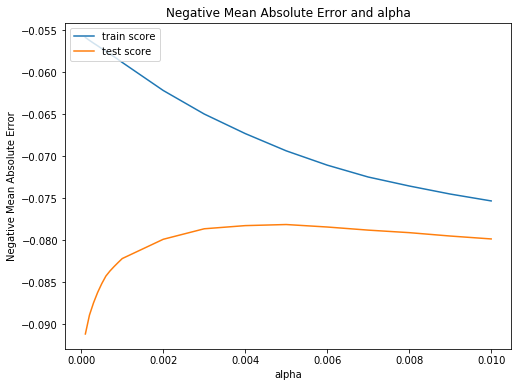

In [94]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.figure(figsize = (8,6))
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [95]:
# looking at the best aplha value and best score

print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.005}
-0.0781404713186302


In [96]:
#Setting the aplha value to 0.005

alpha = 0.005
ridge = Lasso(alpha=alpha)

#Fitting on dataset and seeing the co-efficents

lasso.fit(X_train, y_train)
lasso.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,
       -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0., -0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0.,  0., -0., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,
       -0., -0.,  0.,  0., -0., -0., -0.,  0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,
       -0.,  0., -0., -0., -0., -0., -0., -0., -0.,  0., -0., -0

In [97]:
# model with optimal alpha
# lasso regression

lm_lasso = Lasso(alpha=0.005)
lm_lasso.fit(X_train, y_train)

# predict

#r2 value for training dataset
y_train_pred = lm_lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

#r2 value for testing dataset
y_test_pred = lm_lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9006781049398043
0.879703600323775


In [98]:
#Setting lasso model paramters

model_parameter = list(lm_lasso.coef_)
model_parameter.insert(0, lm_lasso.intercept_)
cols = X.columns
cols.insert(0, 'constant')

# Creating dataframe and see the top 10 co-efficents

Lasso_coeff = pd.DataFrame(list(zip(cols, model_parameter)))
Lasso_coeff.columns = ['Features', 'Co-efficents']
Lasso_coeff = Lasso_coeff[:10].sort_values(by = 'Co-efficents', ascending = False )
Lasso_coeff = Ridge_coeff.reset_index(drop = True)
Lasso_coeff.head(10)

,Features,Co-efficents
0,LotFrontage,11.979115
1,BsmtFinSF1,0.037908
2,BsmtFullBath,0.033090
3,1stFlrSF,0.029817
4,2ndFlrSF,0.020827
5,GrLivArea,0.017995
6,TotalBsmtSF,0.014938
7,OverallQual,0.014280
8,FullBath,0.008690
9,LotArea,0.007687


In [99]:
Lasso_coeff['Features']

0     LotFrontage
1      BsmtFinSF1
2    BsmtFullBath
3        1stFlrSF
4        2ndFlrSF
5       GrLivArea
6     TotalBsmtSF
7     OverallQual
8        FullBath
9         LotArea
Name: Features, dtype: object